# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'> This code, generates Double Moon Dataset. 

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from matplotlib import pyplot as plt
from scipy.special import gammainc
import numpy as np
import pandas as pd
import math
plt.style.use('ggplot')

### <span style='font-family:"Times New Roman"'>Implemented Functions:  

In [2]:
def doublemoon(center,r1,r2,n_points):
    nd = center.size
    x = np.random.normal(size=(n_points, nd))
    sq = np.sum(x**2,axis=1)
    z = (r2-r1)/r2
    fr = (r2-r1)*gammainc(nd/2**z,sq/2**z)**(1/nd)/np.sqrt(sq) + r1/np.sqrt(sq)
    frtiled = np.tile(fr.reshape(n_points,1),(1,nd))
    p = center + np.multiply(x,frtiled)
    return p

In [3]:
r1 = float(input("Enter interior circle radius (In this problem = 0.7): "))
R2 = float(input("Enter main circle radius (In this problem = 1.3): "))
N = int(input("Number of drawn sample : "))

Enter interior circle radius (In this problem = 0.7): 0.7
Enter main circle radius (In this problem = 1.3): 1.3
Number of drawn sample : 500


In [4]:
center = np.array([0,0])
p = doublemoon(center,r1,R2,N)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  # slice df to get 1st and 3rd quadrant values
center = np.array([1,0])
p = doublemoon(center,r1,R2,N)
dg = pd.DataFrame(p)  # transposed for easier plotting
dg = dg[(dg[1]) <= 0]  # slice df to get 1st and 3rd quadrant values

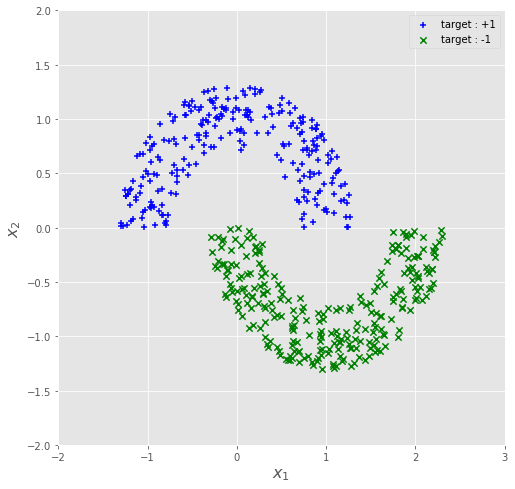

In [5]:
plt.figure(figsize=(8,8))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = df.plot.scatter(0,1, marker='+', c='b',label = "target : +1", s=40, ax = ax)
ax = dg.plot.scatter(0,1, marker='x', c='g',label = "target : -1", s=40, ax = ax) 
ax.set_xlim(-2,3)
ax.set_ylim(-2,2)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()